In [1]:
#!/usr/bin/env python3

In [2]:
# import librarys
import pandas as pd
#import matplotlib.pyplot as plt
from urllib.parse import urlsplit

In [3]:
# pathes
csv = '../data/database/kaggle_competitions_01_original.csv'

In [4]:
# read csv data
df = pd.read_csv(csv, sep=';')

In [5]:
# get shape
df.shape

(1822, 20)

In [6]:
# get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1822 non-null   object 
 1   description    1822 non-null   object 
 2   license        1822 non-null   object 
 3   link           1822 non-null   object 
 4   ml_detected    1822 non-null   float64
 5   ml_libs        1822 non-null   object 
 6   ml_slugs       1822 non-null   object 
 7   ml_terms       1822 non-null   object 
 8   reference      1822 non-null   object 
 9   score_views    1822 non-null   float64
 10  score_votes    1822 non-null   float64
 11  scraped_at     1822 non-null   object 
 12  sources        1822 non-null   object 
 13  tags           1822 non-null   object 
 14  title          1822 non-null   object 
 15  type           1822 non-null   object 
 16  views          1822 non-null   float64
 17  votes          1822 non-null   int64  
 18  score_pr

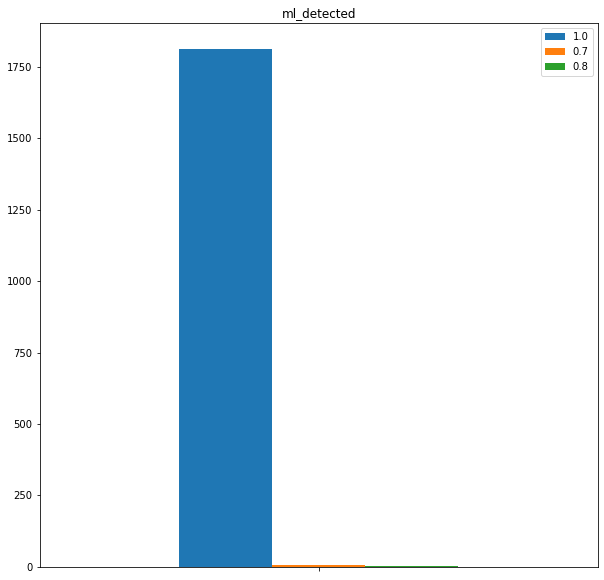

In [7]:
# diagram function
def chart_feature(feature, save=False):
    n = df[feature].value_counts()
    df2=pd.DataFrame([n], index=[''])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=feature)
    fig = ax.get_figure()
    if save:
        fig.savefig(feature + '.png')
    
# create diagram for true ml use cases
chart_feature('ml_detected')

In [8]:
# reduce data to true ml use cases
df = df[df.ml_detected != 0]
df.shape

(1822, 20)

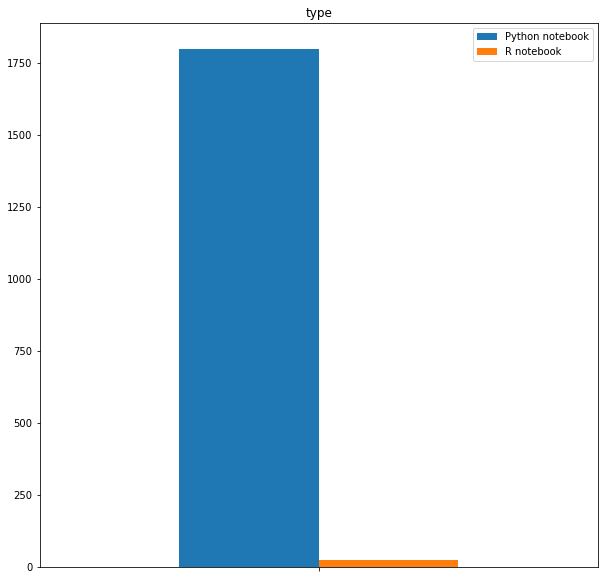

In [9]:
# create diagram for primary language
chart_feature('type')

In [10]:
# diagram function (boolean)
def chart_has_feature(feature, save=False):
    n = [x == None for x in df[feature]]
    n = pd.DataFrame([n], index=[''])
    n = n.value_counts()
    df2=pd.DataFrame([n], index=[''])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=feature)
    fig = ax.get_figure()
    if save:
        fig.savefig(feature + '.png')
        
# create diagram for description
#chart_has_feature('description')
print(df['description'].isnull().sum())

0


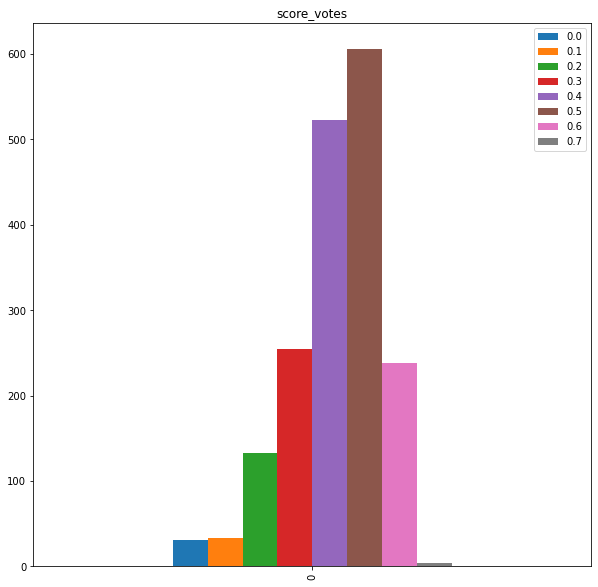

In [11]:
# diagram function sorted by key
def chart_feature_sorted_by_key(feature):
    n = df[feature].value_counts(sort = False)
    n = pd.Series(n.index.values, index=n )
    n = n.sort_values(ascending = True)
    n = pd.Series(n.index.values, index=n )
    df2=pd.DataFrame([n])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=feature, sort_columns=False)
    fig = ax.get_figure()
    fig.savefig(feature + '.png')

# create diagram for stars_score
df = df.round({'score_votes': 1})
chart_feature_sorted_by_key('score_votes')

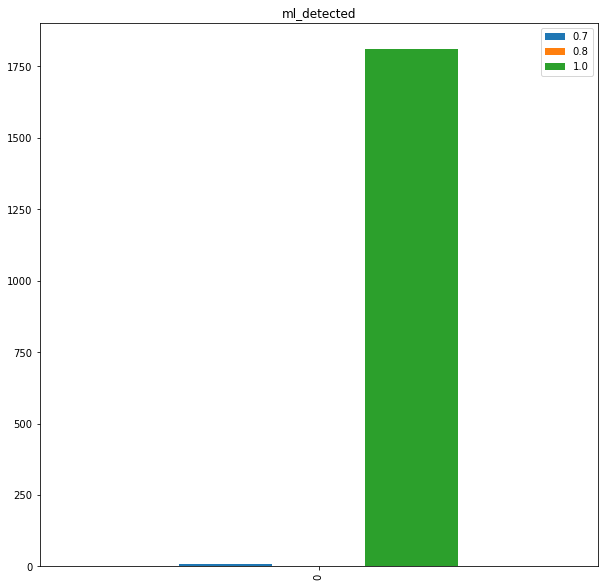

In [12]:
chart_feature_sorted_by_key('ml_detected')

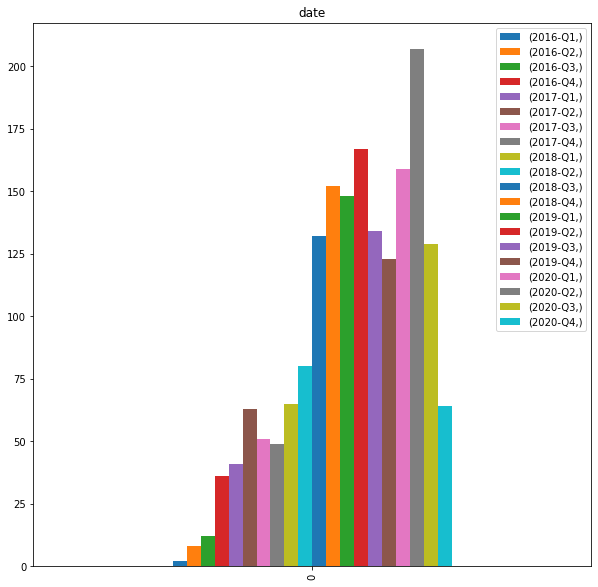

In [13]:
import math

# diagram activity
def chart_activity(feature):
    data = []

    for item in df[feature]:
        if isinstance(item, str):
            parts = item.split('-')
            quarter = math.ceil(int(parts[1]) / 3)
            data.append(parts[0]+'-Q'+str(quarter))
    
    df2 = pd.DataFrame(data)
    
    n = df2.value_counts(sort = False)
    n = pd.Series(n.index.values, index=n)
    n = n.sort_values(ascending = True)
    n = pd.Series(n.index.values, index=n)
    
    df2=pd.DataFrame([n])
    ax = df2.plot(kind='bar', stacked=False, figsize=(10,10), title=feature)
    fig = ax.get_figure()
    fig.savefig(feature + '.png')
    
chart_activity('date')
#chart_activity('scraped_at')